In [107]:
#Predicting Stock Prices
#With Geometric Brownian Motion
#This is a discrete time model
#I.E. all math here is a discrete time analogy of gemetric brownian motion for continous stochastic processes



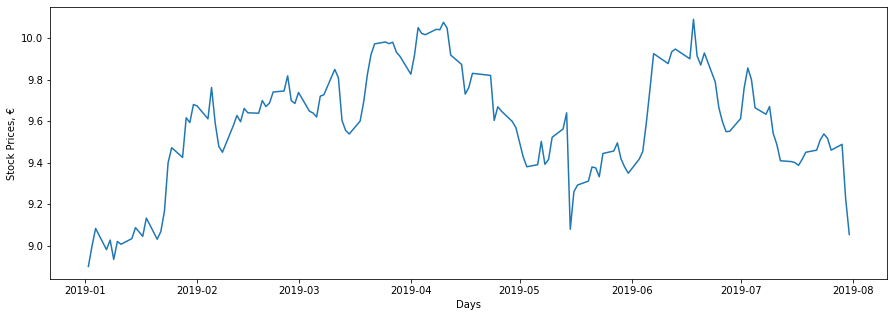

In [108]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# The company being analyzed is EON(a big scale energy company in Europe) 
# stock prices since beginning of 2019 (up to July)

prices = quandl.get("FSE/EON_X", 
                authtoken="J9JNrWRbCK7-agfpqG_b", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
                
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

In [109]:
#2 types of movement in stock prices
#1) general trend
#2) fluctuation within the trend (random shocks)
#Geometric Brownian motion can handle long term trends and it can handle random shocks applied to it

In [110]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

In [113]:
#first) narrow down stocks to range of days I want to analyze

start = '2015-09-01'
end = '2015-09-30'
pred = '2015-10-31'

# We get daily closing stock prices of E.ON for July 2019
table = quandl.get("FSE/EON_X", 
               authtoken="J9JNrWRbCK7-agfpqG_b", 
               start_date = start, end_date = end
               ).reset_index(drop = False)[['Date', 'Close']]
               
print(table.head())
print(table.tail())

        Date  Close
0 2015-09-01   9.88
1 2015-09-02   9.76
2 2015-09-03   9.96
3 2015-09-04   9.44
4 2015-09-07   9.55
         Date  Close
17 2015-09-24   7.31
18 2015-09-25   7.38
19 2015-09-28   7.13
20 2015-09-29   7.32
21 2015-09-30   7.68


In [114]:

closing_stock = table.loc[table.shape[0] - 1, "Close"]
print("this is the closing stock price : ", closing_stock)

time_step = 1
print("This is the time step : ", time_step)


trading_days = pd.date_range(start = pd.to_datetime(end, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = trading_days
print("Number of trading days : ",  T)


N = T / time_step
print("Number of time points : ", N)



time = np.arange(1, int(N) + 1)
print("Elapsed time:", time)


returns = (table.loc[1:, 'Close'] - \
          table.shift(1).loc[1:, 'Close']) / \
          table.shift(1).loc[1:, 'Close']
print("Return for each trading day :", returns.tolist())



#Mean of the returns
mu = np.mean(returns)
print("Mean of the returns : ", mu)


#Gives us a range to work with when introducing random shocks into the geometric brownian motion
sigma = np.std(returns)
print("Standard Deviation of returns of stocks prices : ", sigma)



#this is how many paths or how many different predictions series we want
paths = 2
#b is a random number from the std. it is the random shock introduced to the system for GBM
fluctuation = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, paths + 1)}
print("Perturbation based on std : ", fluctuation)


# W is Brownian path. Includes the effects of all the random shocks since the beginning of the prediction time horizon
#it is like the total effect of randomness introduced to the initial stock price until the specific time point we are up to
AccumPath = {str(scen): fluctuation[str(scen)].cumsum() for scen in range(1, paths + 1)}
print("Path:  ", AccumPath)

this is the closing stock price :  7.68
This is the time step :  1
Number of trading days :  22
Number of time points :  22.0
Elapsed time: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Return for each trading day : [-0.01214574898785435, 0.020491803278688634, -0.05220883534136559, 0.011652542372881484, 0.01780104712041884, -0.0051440329218107725, -0.07652533609100312, -0.043673012318029183, 0.0035128805620610235, -0.061843640606767926, -0.06343283582089539, 0.07968127490039847, -0.05043050430504317, 0.003886010362694333, -0.0451612903225806, 0.008108108108108055, -0.02010723860589817, 0.009575923392612899, -0.03387533875338754, 0.026647966339410994, 0.04918032786885238]
Mean of the returns :  -0.011143329988976604
Standard Deviation of returns of stocks prices :  0.039384495703806255
Perturbation based on std :  {'1': array([ 0.0640728 ,  0.70229615,  0.60229385,  0.31271475,  0.53731926,
       -0.00773449,  1.03480576, -1.1291937 , -0.14455747, -1.0441043 ,
   

In [115]:
#Drift is the longer term trends
#Diffusion is the shorter term random fluctuations (involves the weiner process)

drift = (mu - 0.5 * sigma**2) * time
print("drift:\n", drift)
diffusion = {str(scen): sigma * AccumPath[str(scen)] for scen in range(1, paths + 1)}
print("diffusion:\n", diffusion)

drift:
 [-0.0119189  -0.0238378  -0.0357567  -0.0476756  -0.0595945  -0.0715134
 -0.08343229 -0.09535119 -0.10727009 -0.11918899 -0.13110789 -0.14302679
 -0.15494569 -0.16686459 -0.17878349 -0.19070239 -0.20262129 -0.21454019
 -0.22645909 -0.23837798 -0.25029688 -0.26221578]
diffusion:
 {'1': array([0.00252347, 0.03018305, 0.05390409, 0.06622021, 0.08738225,
       0.08707764, 0.12783294, 0.08336021, 0.07766689, 0.03654537,
       0.04951389, 0.09622403, 0.09214139, 0.14121966, 0.1224659 ,
       0.11602826, 0.14674125, 0.22864556, 0.24484002, 0.15265387,
       0.14741746, 0.16057528]), '2': array([ 0.05364355,  0.05617997,  0.09217317,  0.03308207,  0.03631026,
        0.05483792, -0.00860896, -0.00447419, -0.00277168,  0.03372565,
        0.10389525,  0.12343593,  0.18878184,  0.16173516,  0.08106569,
        0.10581066,  0.09962109,  0.07098847,  0.06434011,  0.07089102,
        0.13773677,  0.15988317])}


In [116]:
#Final predicitons!!!!

#predicting using geometric brownian motion equation for discrete time over a course of 22 days
S = np.array([closing_stock * np.exp(drift + diffusion[str(scen)]) for scen in range(1, paths + 1)]) 

#just adding the inital stock price point to our prediction so we have a starting point
S = np.hstack((np.array([[closing_stock] for scen in range(paths)]), S))
print(S)

[[7.68       7.60818105 7.7288865  7.82064431 7.82375139 7.89640273
  7.80046843 8.02868048 7.5884592  7.45597963 7.07081624 7.07824182
  7.32883658 7.21249724 7.48555094 7.25943467 7.12739222 7.26261178
  7.78909692 7.82247096 7.04906817 6.92917061 6.9377606 ]
 [7.68       8.0072245  7.93244822 8.12573368 7.56873556 7.50324288
  7.55299422 7.00467858 6.95036489 6.87971873 7.0509066  7.47382491
  7.53100643 7.94430799 7.64070687 6.96502884 7.05493814 6.92833377
  6.65299965 6.53061143 6.49564907 6.86241511 6.93296059]]


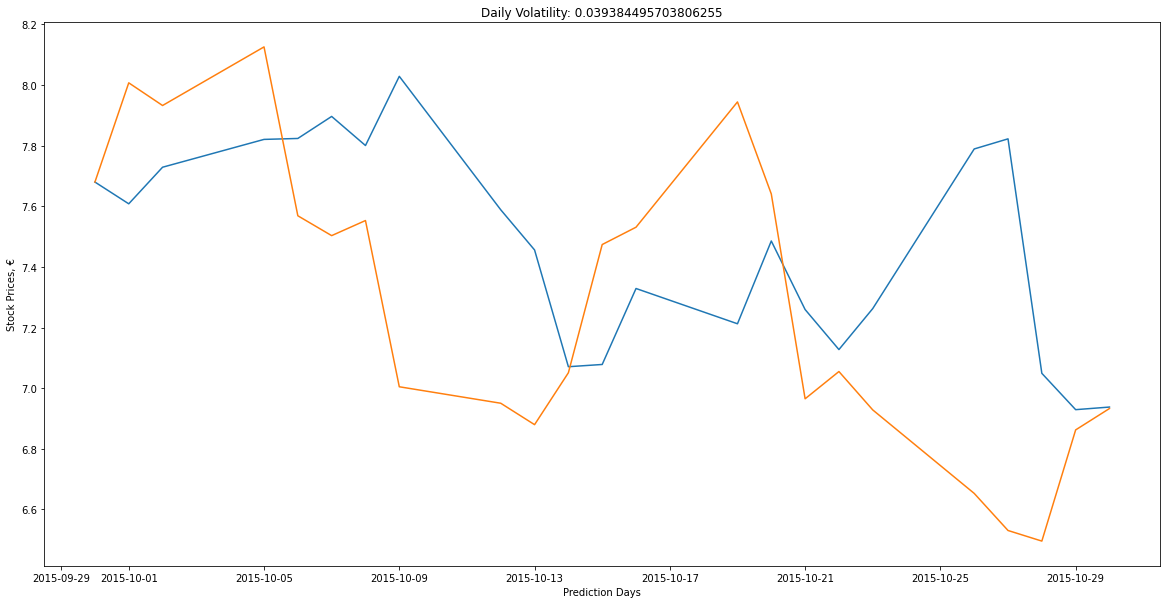

In [117]:

# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(paths):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = table["Date"].max(), 
                end = pred, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
    
plt.show()